In [1]:
# 安装库
!pip install scikit-learn -q

# 导入所需包
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# 上传并读取文件
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# 显示前几行确认
df.head()


Saving twitter_reviews_final_cleaned_v2.csv to twitter_reviews_final_cleaned_v2.csv


,brand,text,created_at,label,cleaned_text
0,Apple,Amazing. Nice product,2024/7/20,positive,amazing nice product
1,Apple,Camerais dam good.,2023/11/10,positive,camerais dam good
2,Apple,Waste phone.,2022/6/6,negative,waste phone
3,Apple,Good. Woooooooow very bootyful camera phone wi...,2024/2/18,positive,good woooooooow bootyful camera phone use dand...
4,Apple,Excellent. Great product,2022/11/18,positive,excellent great product


TF-IDF

In [18]:
# 第二步：按品牌提取 TF-IDF 关键词
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# 自定义函数：提取每个品牌前 N 个关键词
def extract_top_tfidf_words(texts, top_n=20):
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(texts)
    tfidf_scores = X.sum(axis=0).A1  # 每个词的总权重
    words = vectorizer.get_feature_names_out()
    top_indices = tfidf_scores.argsort()[::-1][:top_n]
    top_words = [(words[i], tfidf_scores[i]) for i in top_indices]
    return top_words

# 获取所有品牌
brands = df["brand"].unique()

# 按品牌提取关键词
brand_keywords = {}

for brand in brands:
    texts = df[df["brand"] == brand]["cleaned_text"].dropna().astype(str).tolist()
    top_words = extract_top_tfidf_words(texts, top_n=20)
    brand_keywords[brand] = top_words

# 展示每个品牌的关键词
for brand, keywords in brand_keywords.items():
    print(f"\n {brand} Palabras clave de alta frecuencia (TF-IDF Top 20)：")
    for word, score in keywords:
        print(f"{word}: {score:.4f}")



 Apple Palabras clave de alta frecuencia (TF-IDF Top 20)：
good: 101.6244
phone: 55.3041
nice: 50.1597
product: 46.2315
iphone: 40.4165
best: 31.5689
excellent: 29.8256
great: 28.4982
battery: 28.2532
awesome: 22.2213
camera: 17.8617
like: 17.4944
amazing: 16.7763
apple: 15.6619
money: 15.0479
new: 14.1452
perfect: 12.5009
value: 12.3800
working: 12.3327
condition: 11.7751

 samsung Palabras clave de alta frecuencia (TF-IDF Top 20)：
phone: 986.5233
great: 718.3929
good: 651.0455
love: 467.2409
works: 343.9096
like: 272.4958
new: 239.0180
nice: 235.3369
product: 218.9119
battery: 212.0602
perfect: 187.8128
best: 179.4855
samsung: 172.9618
excellent: 172.7856
use: 166.4108
awesome: 163.4327
work: 159.4780
excelente: 141.6674
far: 133.7270
happy: 130.4997

 Xiaomi Palabras clave de alta frecuencia (TF-IDF Top 20)：
good: 190.1980
phone: 102.3425
nice: 77.6090
camera: 65.9376
product: 59.3870
battery: 57.4557
best: 56.0484
mobile: 56.0387
awesome: 38.1073
redmi: 30.8428
budget: 29.5642
mone


 Tiempo total dedicado a la extracción de palabras clave TF-IDF：0.12 segundo


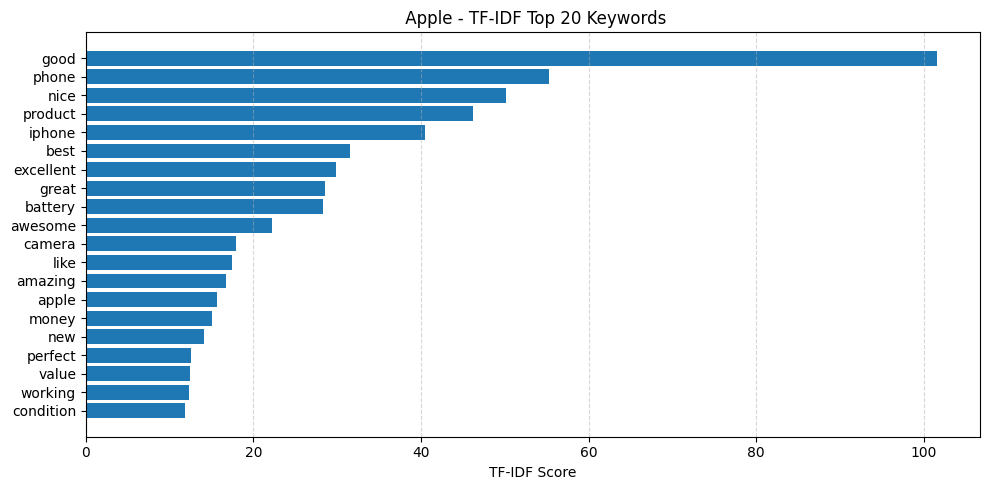

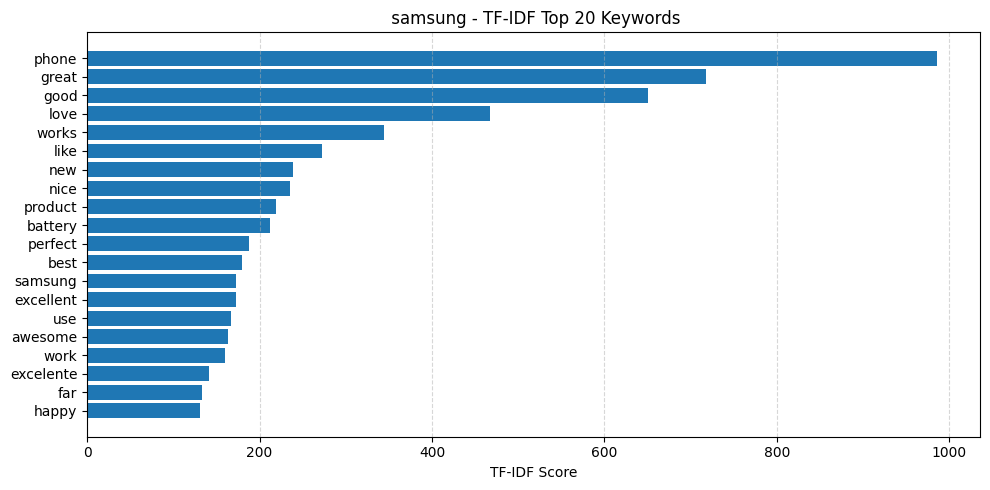

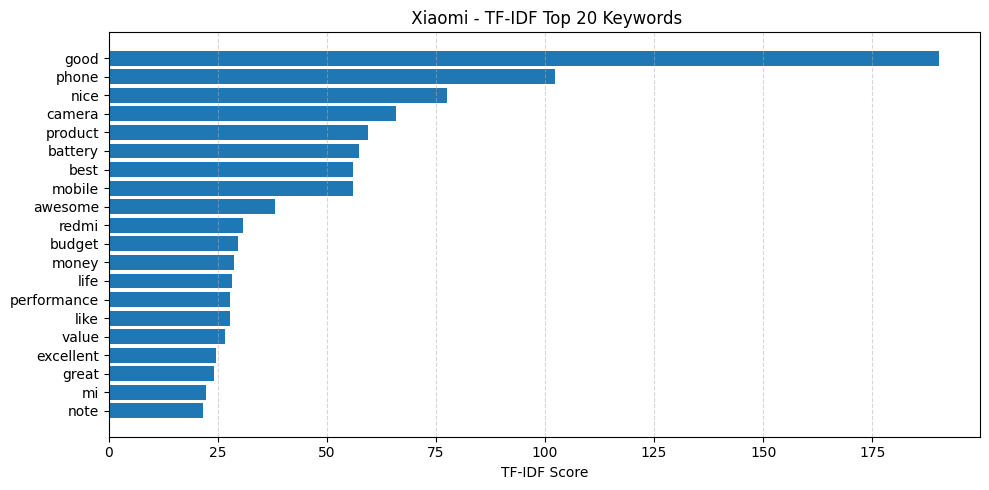

In [9]:
# 安装所需库（如果未安装）
!pip install matplotlib -q

# 导入工具
import time
import matplotlib.pyplot as plt

#  记录开始时间
start_time = time.time()

# 第一步：按品牌提取关键词（你已有代码）
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

def extract_top_tfidf_words(texts, top_n=20):
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(texts)
    tfidf_scores = X.sum(axis=0).A1
    words = vectorizer.get_feature_names_out()
    top_indices = tfidf_scores.argsort()[::-1][:top_n]
    top_words = [(words[i], tfidf_scores[i]) for i in top_indices]
    return top_words

brands = df['brand'].unique()
brand_keywords = {}

for brand in brands:
    texts = df[df['brand'] == brand]['cleaned_text'].dropna().astype(str).tolist()
    top_words = extract_top_tfidf_words(texts, top_n=20)
    brand_keywords[brand] = top_words

#  记录结束时间
end_time = time.time()
print(f"\n Tiempo total dedicado a la extracción de palabras clave TF-IDF：{end_time - start_time:.2f} segundo")

#  可视化：绘制每个品牌前20词条的条形图
for brand, keywords in brand_keywords.items():
    words, scores = zip(*keywords)
    plt.figure(figsize=(10, 5))
    plt.barh(words[::-1], scores[::-1])
    plt.title(f" {brand} - TF-IDF Top 20 Keywords")
    plt.xlabel("TF-IDF Score")
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


 BERTopic

In [3]:
# 安装 BERTopic（如果未安装）
!pip install bertopic -q
!pip install umap-learn -q
!pip install hdbscan -q

# 导入所需库
from bertopic import BERTopic
import pandas as pd

# 准备建模文本（确保每个 brand 单独建模）
df_twitter = df[df['brand'].isin(['Apple', 'samsung', 'Xiaomi'])]  # 可选，只取三品牌


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.1 MB/s eta 0:00:00


In [4]:
from bertopic import BERTopic

# 存储每个品牌的模型和结果
brand_models = {}
brand_topics_info = {}

# 获取品牌列表
brands = df_twitter['brand'].unique()

for brand in brands:
    print(f"\n🔍 正在建模品牌：{brand}")

    # 获取并清洗文本（去除空值、强制为字符串）
    texts = df_twitter[df_twitter['brand'] == brand]['cleaned_text']
    texts = texts.dropna().astype(str).tolist()

    print(f"📄 文本数量：{len(texts)}")

    # 创建并训练 BERTopic 模型
    topic_model = BERTopic(language="english", top_n_words=10, calculate_probabilities=False, verbose=False)
    topics, _ = topic_model.fit_transform(texts)

    # 存储模型和主题信息
    brand_models[brand] = topic_model
    brand_topics_info[brand] = topic_model.get_topic_info()

    # 显示前 5 个主题概览
    print(f"\n📌 {brand} 的前 5 个主题：")
    display(topic_model.get_topic_info().head(5))



🔍 正在建模品牌：Apple
📄 文本数量：917


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


📌 Apple 的前 5 个主题：


,Topic,Count,Name,Representation,Representative_Docs
0,-1,306,-1_phone_iphone_new_product,"[phone, iphone, new, product, good, apple, lik...",[itas amazing phoneafirst time iphone user gre...
1,0,59,0_camera_awesome_battery_best,"[camera, awesome, battery, best, mode, display...",[best camera best camera cinematic mode widean...
2,1,51,1_iphone_apple_love_good,"[iphone, apple, love, good, lovers, perfect, n...","[good iphone good iphone, good iphone good iph..."
3,2,49,2_battery_health_capacity_condition,"[battery, health, capacity, condition, good, b...","[battery bad battery, battery health battery h..."
4,3,35,3_excelente_en_de_el,"[excelente, en, de, el, muy, con, lo, que, la,...",[si era lo que esperaba reciba el producto en ...



🔍 正在建模品牌：samsung
📄 文本数量：9989

📌 samsung 的前 5 个主题：


,Topic,Count,Name,Representation,Representative_Docs
0,-1,2948,-1_works_phone_product_new,"[works, phone, product, new, great, like, scre...","[great phone works great love, im loving reall..."
1,0,328,0_camera_pictures_takes_pics,"[camera, pictures, takes, pics, photos, front,...","[camera great great phone, love phone camera g..."
2,1,325,1_samsung_galaxy_best_love,"[samsung, galaxy, best, love, always, made, fo...","[samsung galaxy phone great phone, samsung lov..."
3,2,221,2_telacfono_telefono_el_de,"[telacfono, telefono, el, de, buen, muy, un, e...","[muy bueno excelente telacfono, excelente tela..."
4,3,176,3_lo_que_llego_perfecto,"[lo, que, llego, perfecto, celular, en, tiempo...",[excelente encanta llego saoper rapido viene d...



🔍 正在建模品牌：Xiaomi
📄 文本数量：1494

📌 Xiaomi 的前 5 个主题：


,Topic,Count,Name,Representation,Representative_Docs
0,-1,415,-1_phone_good_battery_camera,"[phone, good, battery, camera, like, product, ...",[budget phone k battery good beast phone budge...
1,0,238,0_camera_battery_good_display,"[camera, battery, good, display, fast, best, f...","[camera good, good phone camera best battery g..."
2,1,149,1_problem_working_hanging_call,"[problem, working, hanging, call, screen, time...",[issued phones network internet issues wifi is...
3,2,79,2_redmi_note_phone_mi,"[redmi, note, phone, mi, mobile, feb, gb, alwa...","[good redmi phone, nice mobile redmi note, bes..."
4,3,73,3_good_hello_behaviour_bad,"[good, hello, behaviour, bad, one, nothing, , ...","[good, good, good]"


In [17]:
# 可视化每个品牌最常见的前5个主题词（柱状图）
for brand in brand_models:
    print(f"\n {brand} Gráficos de barras (5 temas principales)")
    fig = brand_models[brand].visualize_barchart(top_n_topics=5)
    fig.show()



 Apple Gráficos de barras (5 temas principales)



 samsung Gráficos de barras (5 temas principales)



 Xiaomi Gráficos de barras (5 temas principales)


In [15]:
# 提取前3个主题的关键词集合
brand_top_keywords = {}

for brand, model in brand_models.items():
    topics = model.get_topics()
    top_keywords = set()
    for topic_id in [0, 1, 2]:  # 主题编号从0开始
        if topic_id in topics:
            words = [word for word, _ in topics[topic_id][:10]]  # 取前10个关键词
            top_keywords.update(words)
    brand_top_keywords[brand] = top_keywords

# 交集和差集
brands = list(brand_top_keywords.keys())
for i in range(len(brands)):
    for j in range(i + 1, len(brands)):
        b1, b2 = brands[i], brands[j]
        common = brand_top_keywords[b1] & brand_top_keywords[b2]
        only_b1 = brand_top_keywords[b1] - brand_top_keywords[b2]
        only_b2 = brand_top_keywords[b2] - brand_top_keywords[b1]

        print(f"\n {b1} vs {b2} Comparación de palabras clave")
        print(f"Palabras clave comunes (Top3 temas): {sorted(common)}")
        print(f"{b1} Palabras clave únicas: {sorted(only_b1)}")
        print(f"{b2} Palabras clave únicas: {sorted(only_b2)}")



 Apple vs samsung Comparación de palabras clave
Palabras clave comunes (Top3 temas): ['awesome', 'best', 'camera', 'love', 'photos']
Apple Palabras clave únicas: ['apple', 'backup', 'battery', 'better', 'capacity', 'condition', 'dgreat', 'display', 'good', 'health', 'iphone', 'iphones', 'life', 'long', 'lovers', 'mode', 'never', 'night', 'perfect', 'performance', 'really', 'super', 'time']
samsung Palabras clave únicas: ['always', 'amazing', 'buen', 'clear', 'de', 'el', 'es', 'ever', 'focus', 'front', 'galaxy', 'ive', 'la', 'made', 'muy', 'pics', 'pictures', 'que', 'samsung', 'takes', 'telacfono', 'telefono', 'un', 'upgrade', 'videos']

 Apple vs Xiaomi Comparación de palabras clave
Palabras clave comunes (Top3 temas): ['battery', 'best', 'camera', 'display', 'good', 'performance', 'time']
Apple Palabras clave únicas: ['apple', 'awesome', 'backup', 'better', 'capacity', 'condition', 'dgreat', 'health', 'iphone', 'iphones', 'life', 'long', 'love', 'lovers', 'mode', 'never', 'night', 'p

In [16]:
import pandas as pd
from IPython.display import display

top_keywords_df = pd.DataFrame()

for brand, model in brand_models.items():
    topic_info = model.get_topic_info().head(1)  # Top 1主题（主题编号非-1）
    top_topic_id = topic_info.iloc[0]['Topic']
    keywords = model.get_topic(top_topic_id)
    keywords_list = [word for word, _ in keywords[:10]]  # 前10关键词

    row = pd.DataFrame({
        'Brand': [brand],
        'Top_Topic_ID': [top_topic_id],
        'Top_Keywords': [', '.join(keywords_list)]
    })

    top_keywords_df = pd.concat([top_keywords_df, row], ignore_index=True)

# 显示并导出表格
display(top_keywords_df)
top_keywords_df.to_csv("top_keywords_by_brand.csv", index=False)
print(" Se ha guardado una tabla de las palabras clave más importantes para cada marca como top_keywords_by_brand.csv")


,Brand,Top_Topic_ID,Top_Keywords
0,Apple,-1,"phone, iphone, new, product, good, apple, like..."
1,samsung,-1,"works, phone, product, new, great, like, scree..."
2,Xiaomi,-1,"phone, good, battery, camera, like, product, m..."


 Se ha guardado una tabla de las palabras clave más importantes para cada marca como top_keywords_by_brand.csv
